# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [160]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [143]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# api.openweathermap.org/data/2.5/weather?id={city id}&appid={your api key}
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=4f7d4d7ae256c377cecece7ed397bf73&units=imperial&q='

In [144]:
# Looping through the Data and adding it to my list
response = []
for city in cities:
    response.append(requests.get(query_url + city).json())
    # Printing the log of the data being processed
    print("Processing Record"+ " " + str(cities.index(city)) + " | " + city  )


Processing Record 0 | punta arenas
Processing Record 1 | kruisfontein
Processing Record 2 | macaboboni
Processing Record 3 | barentsburg
Processing Record 4 | esperance
Processing Record 5 | bluff
Processing Record 6 | port elizabeth
Processing Record 7 | kota kinabalu
Processing Record 8 | parfenyevo
Processing Record 9 | jamestown
Processing Record 10 | buraydah
Processing Record 11 | taolanaro
Processing Record 12 | necochea
Processing Record 13 | verkh-chebula
Processing Record 14 | phetchabun
Processing Record 15 | hermanus
Processing Record 16 | surgut
Processing Record 17 | tuktoyaktuk
Processing Record 18 | finschhafen
Processing Record 19 | amderma
Processing Record 20 | san quintin
Processing Record 21 | beinamar
Processing Record 22 | geraldton
Processing Record 23 | new norfolk
Processing Record 24 | tuatapere
Processing Record 25 | tasiilaq
Processing Record 26 | kavaratti
Processing Record 27 | forquilhinha
Processing Record 28 | puerto ayora
Processing Record 29 | norman

Processing Record 247 | fraserburgh
Processing Record 248 | talcahuano
Processing Record 249 | nikolskoye
Processing Record 250 | turukhansk
Processing Record 251 | bedele
Processing Record 252 | karamay
Processing Record 253 | mys shmidta
Processing Record 254 | maceio
Processing Record 255 | mahebourg
Processing Record 256 | rypefjord
Processing Record 257 | pacov
Processing Record 258 | ituni
Processing Record 259 | shelabolikha
Processing Record 260 | kulhudhuffushi
Processing Record 261 | bria
Processing Record 262 | charters towers
Processing Record 263 | tremedal
Processing Record 264 | mitsamiouli
Processing Record 265 | inhambane
Processing Record 266 | kushiro
Processing Record 267 | mentok
Processing Record 268 | umzimvubu
Processing Record 269 | nanortalik
Processing Record 270 | louisbourg
Processing Record 271 | kimbe
Processing Record 272 | anadyr
Processing Record 273 | manono
Processing Record 274 | saint-francois
Processing Record 275 | bandarbeyla
Processing Record 2

Processing Record 492 | gat
Processing Record 493 | concordia
Processing Record 494 | kouroussa
Processing Record 495 | sechura
Processing Record 496 | marawi
Processing Record 497 | chulym
Processing Record 498 | meyungs
Processing Record 499 | tiznit
Processing Record 500 | ndjole
Processing Record 501 | krasnoarmeysk
Processing Record 502 | aberdeen
Processing Record 503 | santa maria
Processing Record 504 | qinhuangdao
Processing Record 505 | estelle
Processing Record 506 | san rafael
Processing Record 507 | savinskiy
Processing Record 508 | tay ninh
Processing Record 509 | sao filipe
Processing Record 510 | bharatpur
Processing Record 511 | phalombe
Processing Record 512 | evensk
Processing Record 513 | san patricio
Processing Record 514 | tumannyy
Processing Record 515 | plyussa
Processing Record 516 | pangkalanbuun
Processing Record 517 | ambilobe
Processing Record 518 | namikupa
Processing Record 519 | fortuna
Processing Record 520 | archis
Processing Record 521 | neiafu
Proces

In [145]:
# Looking at my list of dictionaries
response

[{'coord': {'lon': -70.92, 'lat': -53.15},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03n'}],
  'base': 'stations',
  'main': {'temp': 50,
   'feels_like': 44.42,
   'temp_min': 50,
   'temp_max': 50,
   'pressure': 999,
   'humidity': 76},
  'visibility': 10000,
  'wind': {'speed': 6.93, 'deg': 250},
  'clouds': {'all': 40},
  'dt': 1581483032,
  'sys': {'type': 1,
   'id': 8487,
   'country': 'CL',
   'sunrise': 1581500124,
   'sunset': 1581553237},
  'timezone': -10800,
  'id': 3874787,
  'name': 'Punta Arenas',
  'cod': 200},
 {'coord': {'lon': 24.73, 'lat': -34},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'model',
  'main': {'temp': 70.29,
   'feels_like': 68.99,
   'temp_min': 70.29,
   'temp_max': 70.29,
   'pressure': 1014,
   'humidity': 69,
   'sea_level': 1014,
   'grnd_level': 983},
  'wind': {'speed': 7.87, 'deg': 38},
  'clouds': {'all': 0},
  'dt': 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [169]:
# Creating Empty Lists for my DF

place = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

for location in response:
    try:
        # Adding the names of the cities to my name list
        place.append(location['name'])
        # adding cloudiness to the list
        cloudiness.append(location['clouds']['all'])
        # adding country to the list
        country.append(location['sys']['country'])
        # adding date to the list
        date.append(location['dt'])
        # adding humidity to the list
        humidity.append(location['main']['humidity'])
        # adding latitude to the list
        latitude.append(location['coord']['lat'])
        # adding long to the list
        longitude.append(location['coord']['lon'])
        # adding max_temp to the list
        max_temp.append(location['main']['temp_max'])
        # adding windspeed to the list
        wind_speed.append(location['wind']['speed'])
    except KeyError:
        pass

# Turning the lists into a dataframe
    
dfs = pd.DataFrame({'City': place, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, "Latitude": latitude, "Longitude": longitude, "Max Temp": max_temp, "Wind Speed": wind_speed})
dfs


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Punta Arenas,40,CL,1581483032,76,-53.15,-70.92,50.00,6.93
1,Kruisfontein,0,ZA,1581483033,69,-34.00,24.73,70.29,7.87
2,Esperance,90,AU,1581483033,72,-33.87,121.90,68.00,9.17
3,Bluff,99,NZ,1581483033,75,-46.60,168.33,63.00,7.00
4,Port Elizabeth,0,ZA,1581483034,88,-33.92,25.57,68.00,9.17
...,...,...,...,...,...,...,...,...,...
558,Padang,97,ID,1581482653,76,-0.95,100.35,77.92,4.16
559,Severomuysk,84,RU,1581483154,80,56.15,113.43,-4.49,6.33
560,Fuyu,85,CN,1581482958,100,45.18,124.82,33.04,6.53
561,Quryq,18,KZ,1581483155,68,43.20,51.65,36.84,26.60


In [194]:
# Exporting Dataframe as CSV
dfs.to_csv(r'export_dataframe.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

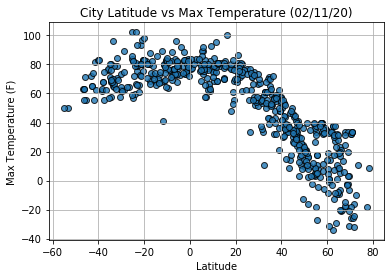

In [185]:
# Creating my open canvas

fig, ax = plt.subplots()
ax.scatter(latitude, max_temp, edgecolors = "black", alpha = 0.8)

fig;

# Creating my grid and labels

ax.set(xlabel = "Latitude", ylabel="Max Temperature (F)", title="City Latitude vs Max Temperature (02/11/20)");
ax.grid('on', which='major')

In [187]:
#Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "Lat vs MaxTemp.png")
path
fig.savefig(path)

#### Latitude vs. Humidity Plot

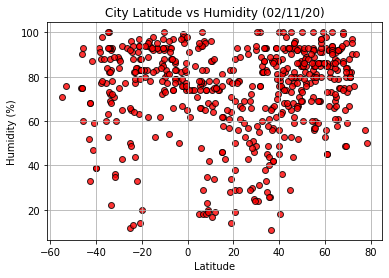

In [188]:
# Creating my open canvas

fig2, ax2 = plt.subplots()
ax2.scatter(latitude, humidity, edgecolors = "black", c= "red", alpha = 0.8)

fig2;

# Creating my grid and labels

ax2.set(xlabel = "Latitude", ylabel="Humidity (%)", title="City Latitude vs Humidity (02/11/20)");
ax2.grid('on', which='major')

In [189]:
#Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "Lat vs Humidity.png")
path
fig2.savefig(path)

#### Latitude vs. Cloudiness Plot

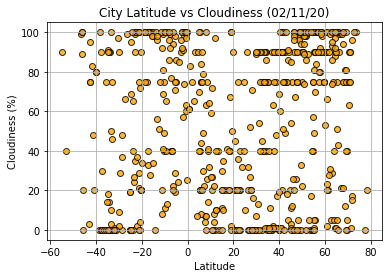

In [190]:
# Creating my open canvas
fig3, ax3 = plt.subplots()
ax3.scatter(latitude, cloudiness, edgecolors = "black", c= "orange", alpha = 0.8)

fig3;

# Creating my grid and labels

ax3.set(xlabel = "Latitude", ylabel="Cloudiness (%)", title="City Latitude vs Cloudiness (02/11/20)");
ax3.grid('on', which='major')

In [191]:
#Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "Lat vs Cloudiness.png")
path
fig3.savefig(path)

#### Latitude vs. Wind Speed Plot

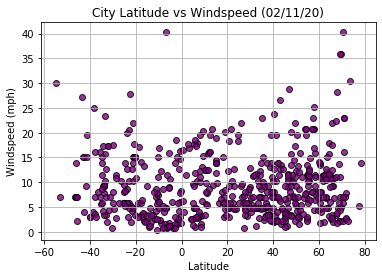

In [192]:
# Creating my open canvas
fig4, ax4 = plt.subplots()
ax4.scatter(latitude, wind_speed, edgecolors = "black", c= "purple", alpha = 0.8)

fig4;

# Creating my grid and labels

ax4.set(xlabel = "Latitude", ylabel="Windspeed (mph)", title="City Latitude vs Windspeed (02/11/20)");
ax4.grid('on', which='major')

In [193]:
#Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "Lat vs Windspeed.png")
path
fig4.savefig(path)